# Introduction

This notebook simulates the top mass reweighting by using Gaussian with mean 172.5 and 175 with with large variance

In [6]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

## Imports

In [7]:
# standard library imports
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense, Input, Layer, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.initializers import Constant
from tensorflow.keras.backend import concatenate

# standard numerical library imports
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

In [8]:
# Global plot settings
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22) 
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
rc('legend', fontsize=15)

# Scanning value for reweighting from $\mathcal{N}(172.5, \sigma)$ to $\mathcal{N}(175, \sigma)$

## Build datasets

In [9]:
def reweight(n_data_points):
    mu0 = 172.5
    mu1 = 175
    sigma = 30
    var0 = sigma
    var1 = sigma

    X0 = np.random.normal(mu0, var0, n_data_points)
    X1 = np.random.normal(mu1, var1, n_data_points)
    
    bins = np.linspace(100,250,50)
    plt.hist(X0, bins = bins, alpha = 0.5, label = r'$\mu=172.5$')
    plt.hist(X1, bins = bins, alpha = 0.5, label = r'$\mu=175$')
    plt.legend()
    plt.title("Data for reweighting with $\sigma= $ "+ str(sigma))
    plt.show()

    Y0 = to_categorical(np.zeros(n_data_points), num_classes=2)
    Y1 = to_categorical(np.ones(n_data_points), num_classes=2)

    X = np.concatenate((X0, X1))
    Y = np.concatenate((Y0, Y1))

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    inputs = Input((1,))
    hidden_layer_1 = Dense(20, activation='relu')(inputs)
    hidden_layer_2 = Dense(20, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(20, activation='relu')(hidden_layer_2)

    outputs = Dense(2, activation='softmax')(hidden_layer_3)

    model = Model(inputs = inputs, outputs = outputs)
    model.compile(loss='categorical_crossentropy', optimizer='Adam', )
    
    epochs_num = 10
    earlystopping = EarlyStopping(patience = epochs_num,)

    history = model.fit(X_train, Y_train, 
              epochs=epochs_num, 
              batch_size = 100,
              validation_data = (X_test, Y_test),
              callbacks = [earlystopping])
    plt.plot(history.history['loss'],     label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val loss')
    plt.legend(loc=0)
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.show()
    
    X0_val = np.random.normal(mu0, var0, n_data_points)
    X1_val = np.random.normal(mu1, var1, n_data_points)
    
    preds = model.predict(X0_val)
    weights = preds[:,1]/preds[:,0]
    
    bins = np.linspace(0.5,1.5,50)
    plt.hist(weights, bins = bins, alpha = 0.5)[0]
    plt.title("Distribution of weight")
    plt.show()
    
    bins = np.linspace(100,250,50)
    plt.hist(X0_val, bins = bins, alpha = 0.5, label = r'$\mu=172.5$')
    plt.hist(X0_val, bins = bins, label = r'$172.5$ weighted', weights=weights, histtype='step', color='k')
    plt.hist(X1_val, bins = bins, alpha = 0.5, label = r'$\mu=175$')
    plt.legend()
    plt.show()

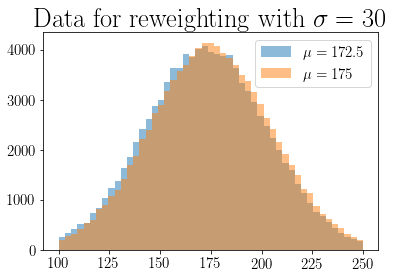

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 15s 93us/step - loss: 0.7300 - val_loss: 0.6959
Epoch 2/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.7223 - val_loss: 0.6926
Epoch 3/10
160000/160000 [==============================] - 12s 72us/step - loss: 0.7196 - val_loss: 0.7022
Epoch 4/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.7147 - val_loss: 0.6927
Epoch 5/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.7130 - val_loss: 0.7236
Epoch 6/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.7090 - val_loss: 0.7270
Epoch 7/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.7060 - val_loss: 0.7499
Epoch 8/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.7036 - val_loss: 0.7073
Epoch 9/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.7

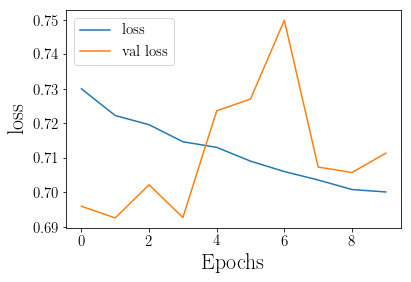

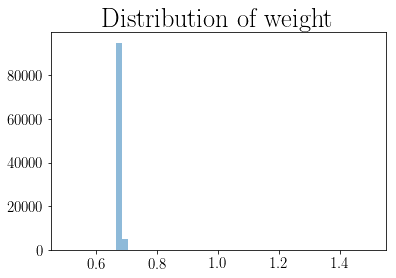

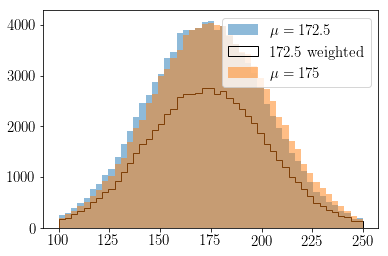

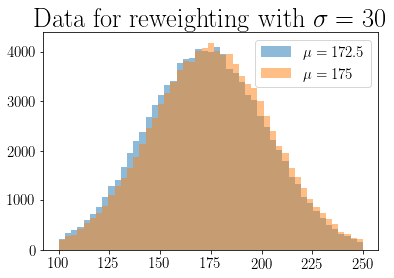

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 16s 97us/step - loss: 0.7482 - val_loss: 0.8050
Epoch 2/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.7285 - val_loss: 0.7164
Epoch 3/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.7237 - val_loss: 0.6930
Epoch 4/10
160000/160000 [==============================] - 12s 78us/step - loss: 0.7176 - val_loss: 0.7336
Epoch 5/10
160000/160000 [==============================] - 12s 75us/step - loss: 0.7205 - val_loss: 0.7711
Epoch 6/10
160000/160000 [==============================] - 11s 68us/step - loss: 0.7142 - val_loss: 0.7203
Epoch 7/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.7091 - val_loss: 0.6981
Epoch 8/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.7074 - val_loss: 0.6955
Epoch 9/10
160000/160000 [==============================] - 13s 82us/step - loss: 0.7

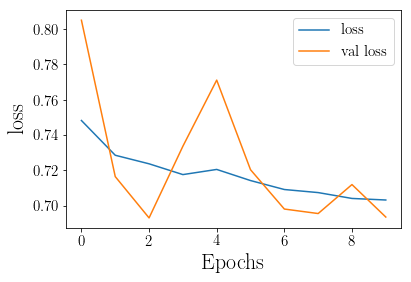

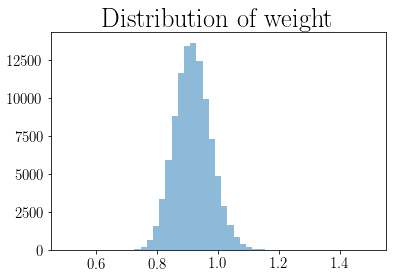

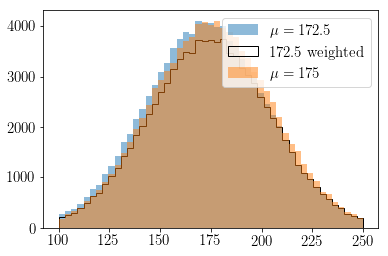

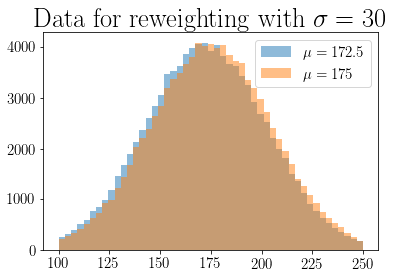

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 16s 102us/step - loss: 0.7081 - val_loss: 0.6947
Epoch 2/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.7023 - val_loss: 0.6951
Epoch 3/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6981 - val_loss: 0.6942
Epoch 4/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6948 - val_loss: 0.6962
Epoch 5/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6940 - val_loss: 0.6924
Epoch 6/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6932 - val_loss: 0.6951
Epoch 7/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 8/10
160000/160000 [==============================] - 13s 79us/step - loss: 0.6932 - val_loss: 0.6931
Epoch 9/10
160000/160000 [==============================] - 12s 75us/step - loss: 0.

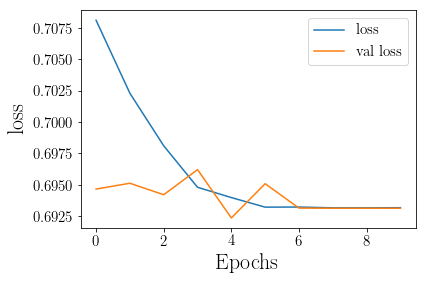

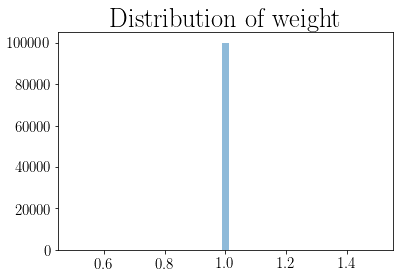

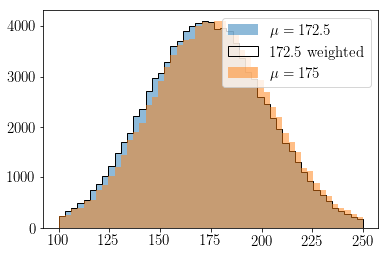

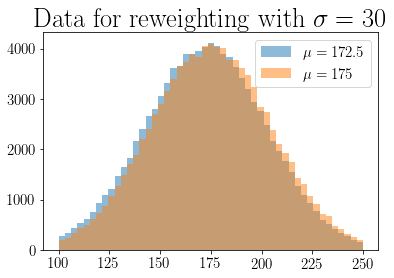

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 104us/step - loss: 0.7108 - val_loss: 0.6952
Epoch 2/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6998 - val_loss: 0.6925
Epoch 3/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6967 - val_loss: 0.7015
Epoch 4/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6946 - val_loss: 0.6930
Epoch 5/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6937 - val_loss: 0.6923
Epoch 6/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6928 - val_loss: 0.6956
Epoch 7/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6928 - val_loss: 0.6929
Epoch 8/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6928 - val_loss: 0.6926
Epoch 9/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.

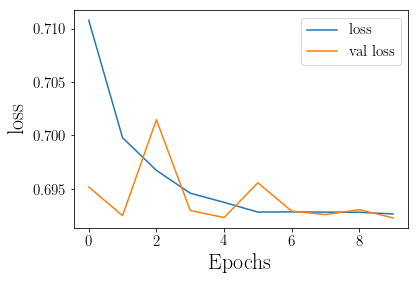

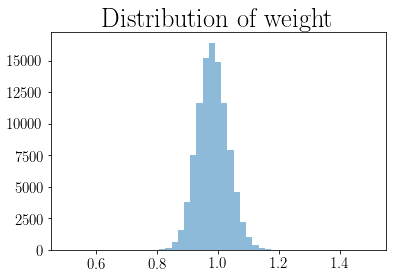

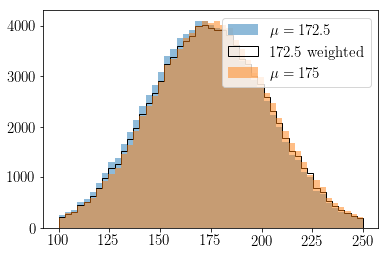

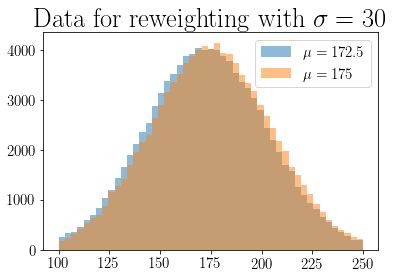

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 16s 101us/step - loss: 0.7187 - val_loss: 0.6948
Epoch 2/10
160000/160000 [==============================] - 12s 75us/step - loss: 0.6978 - val_loss: 0.6924
Epoch 3/10
160000/160000 [==============================] - 13s 82us/step - loss: 0.6964 - val_loss: 0.6941
Epoch 4/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6940 - val_loss: 0.6923
Epoch 5/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6930 - val_loss: 0.6925
Epoch 6/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6932 - val_loss: 0.6925
Epoch 7/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6931 - val_loss: 0.6926
Epoch 8/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6932 - val_loss: 0.6937
Epoch 9/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.

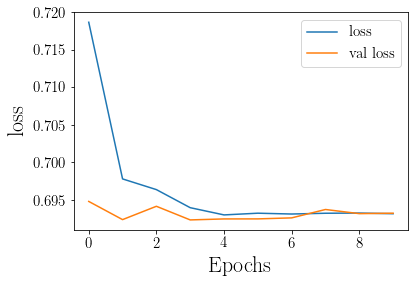

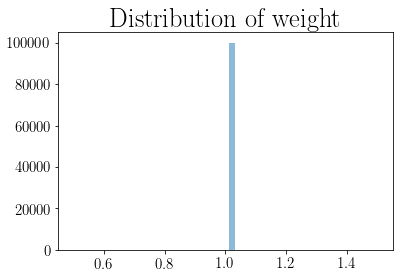

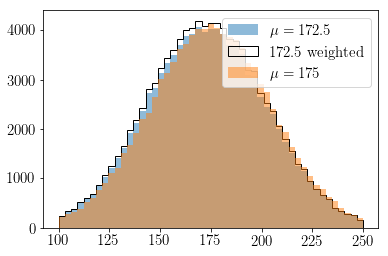

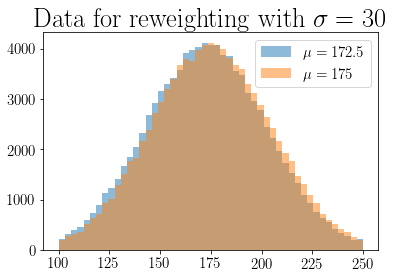

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 105us/step - loss: 0.7113 - val_loss: 0.6926
Epoch 2/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.7029 - val_loss: 0.6933
Epoch 3/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.6995 - val_loss: 0.7124
Epoch 4/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.6984 - val_loss: 0.6940
Epoch 5/10
160000/160000 [==============================] - 12s 73us/step - loss: 0.6958 - val_loss: 0.6994
Epoch 6/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6945 - val_loss: 0.6930
Epoch 7/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6928 - val_loss: 0.6933
Epoch 8/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6930 - val_loss: 0.6928
Epoch 9/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.

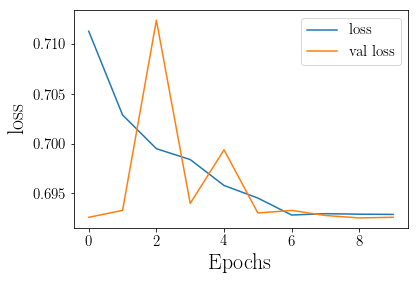

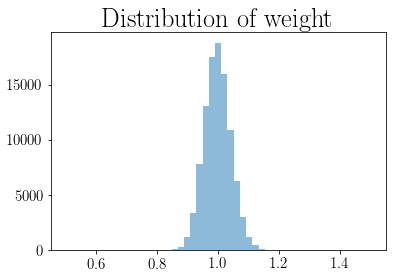

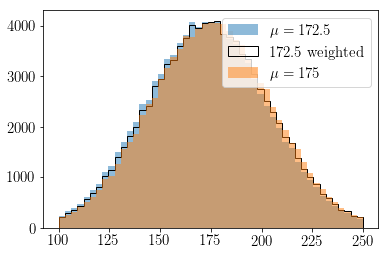

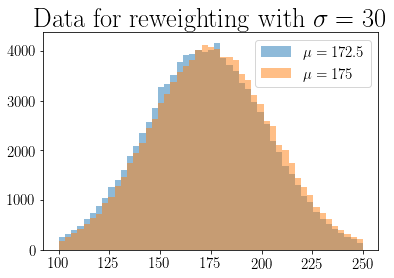

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 106us/step - loss: 0.7333 - val_loss: 0.7636
Epoch 2/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.7048 - val_loss: 0.6988
Epoch 3/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.7029 - val_loss: 0.6928
Epoch 4/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.7002 - val_loss: 0.6940
Epoch 5/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6976 - val_loss: 0.6939
Epoch 6/10
160000/160000 [==============================] - 13s 78us/step - loss: 0.6956 - val_loss: 0.6943
Epoch 7/10
160000/160000 [==============================] - 12s 76us/step - loss: 0.6940 - val_loss: 0.6975
Epoch 8/10
160000/160000 [==============================] - 11s 67us/step - loss: 0.6934 - val_loss: 0.6927
Epoch 9/10
160000/160000 [==============================] - 13s 82us/step - loss: 0.

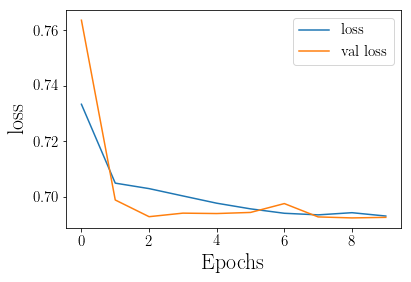

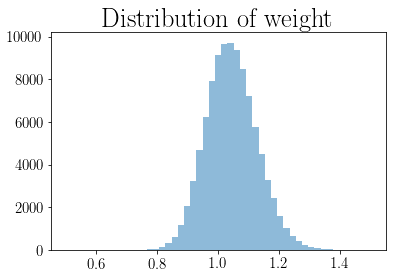

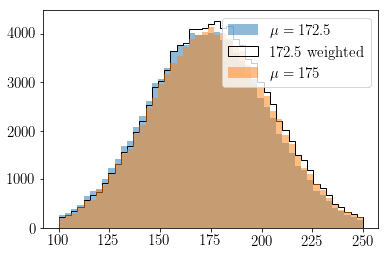

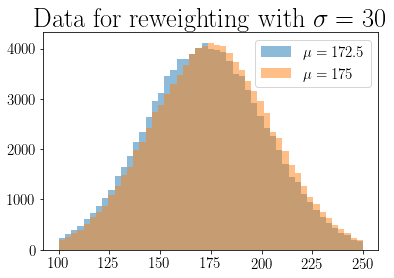

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 16s 97us/step - loss: 0.7281 - val_loss: 0.6947
Epoch 2/10
160000/160000 [==============================] - 12s 78us/step - loss: 0.7096 - val_loss: 0.6997
Epoch 3/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.7029 - val_loss: 0.7164
Epoch 4/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.7020 - val_loss: 0.7045
Epoch 5/10
160000/160000 [==============================] - 12s 78us/step - loss: 0.6974 - val_loss: 0.6928
Epoch 6/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.6941 - val_loss: 0.6923
Epoch 7/10
160000/160000 [==============================] - 12s 78us/step - loss: 0.6931 - val_loss: 0.6934
Epoch 8/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.6932 - val_loss: 0.6925
Epoch 9/10
160000/160000 [==============================] - 12s 75us/step - loss: 0.6

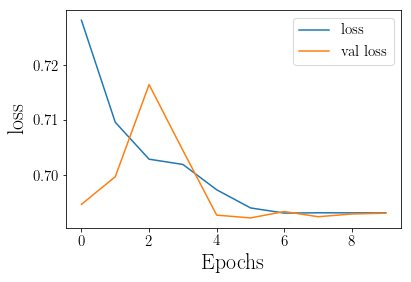

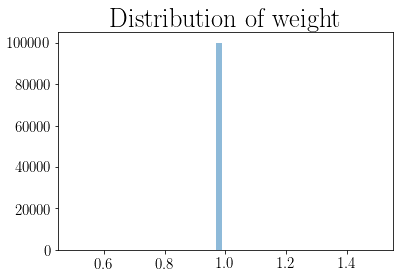

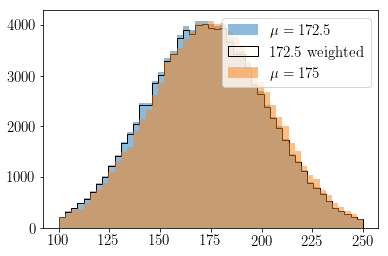

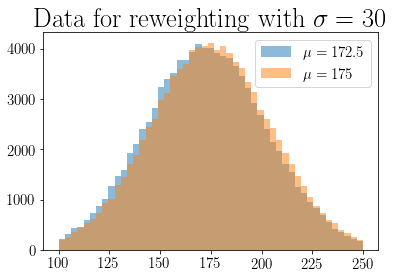

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 16s 99us/step - loss: 0.7448 - val_loss: 0.6975
Epoch 2/10
160000/160000 [==============================] - 13s 79us/step - loss: 0.7004 - val_loss: 0.7012
Epoch 3/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6977 - val_loss: 0.7015
Epoch 4/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6959 - val_loss: 0.6958
Epoch 5/10
160000/160000 [==============================] - 13s 79us/step - loss: 0.6948 - val_loss: 0.6957
Epoch 6/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.6933 - val_loss: 0.6927
Epoch 7/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6929 - val_loss: 0.6925
Epoch 8/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6929 - val_loss: 0.6936
Epoch 9/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6

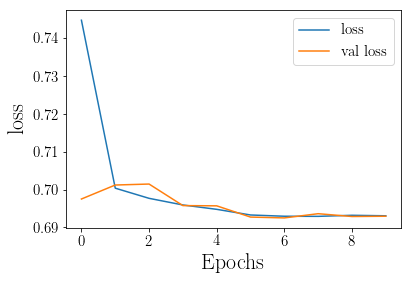

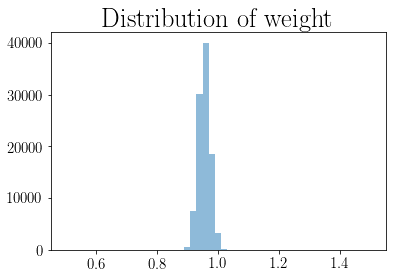

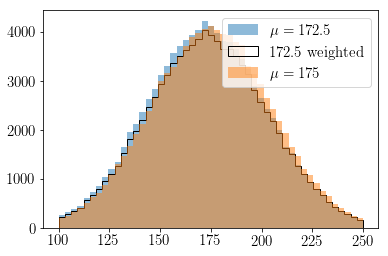

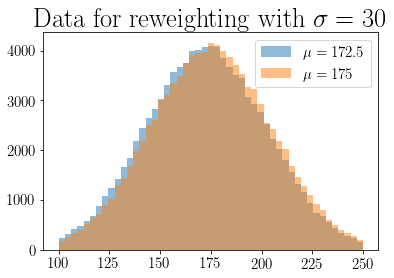

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 15s 95us/step - loss: 0.7124 - val_loss: 0.6935
Epoch 2/10
160000/160000 [==============================] - 11s 68us/step - loss: 0.7038 - val_loss: 0.6926
Epoch 3/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.7009 - val_loss: 0.6996
Epoch 4/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6992 - val_loss: 0.7007
Epoch 5/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6944 - val_loss: 0.6927
Epoch 6/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6931 - val_loss: 0.6972
Epoch 7/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6930 - val_loss: 0.6935
Epoch 8/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6933 - val_loss: 0.6930
Epoch 9/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6

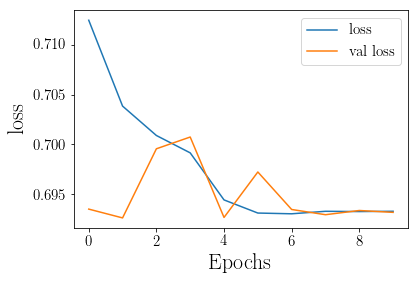

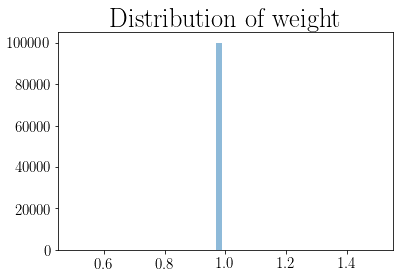

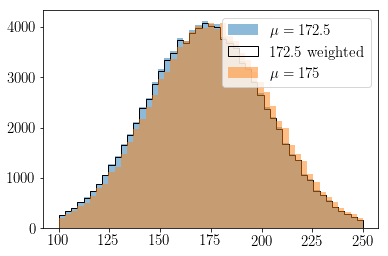

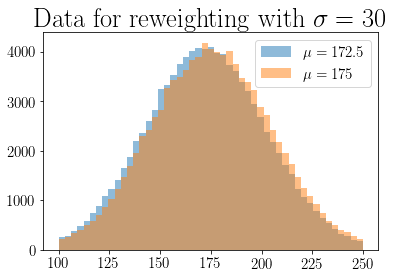

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 108us/step - loss: 0.7122 - val_loss: 0.6977
Epoch 2/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6982 - val_loss: 0.6953
Epoch 3/10
160000/160000 [==============================] - 12s 78us/step - loss: 0.6956 - val_loss: 0.7007
Epoch 4/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.6944 - val_loss: 0.6925
Epoch 5/10
160000/160000 [==============================] - 11s 69us/step - loss: 0.6935 - val_loss: 0.6923
Epoch 6/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6928 - val_loss: 0.6931
Epoch 7/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6932 - val_loss: 0.6929
Epoch 8/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6930 - val_loss: 0.6933
Epoch 9/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.

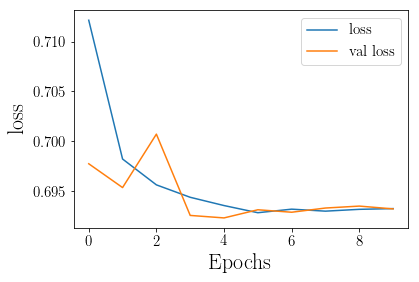

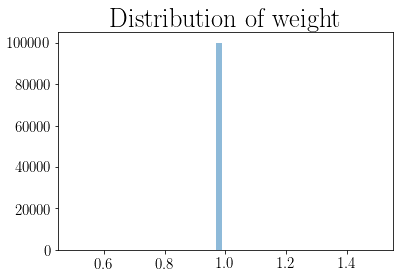

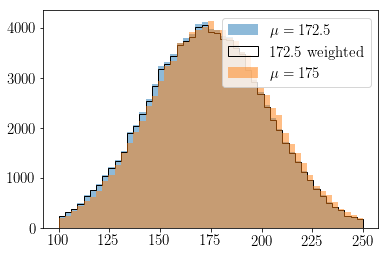

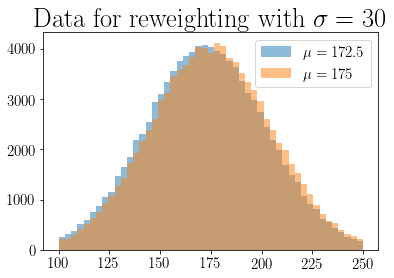

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 106us/step - loss: 0.7064 - val_loss: 0.6941
Epoch 2/10
160000/160000 [==============================] - 14s 84us/step - loss: 0.7000 - val_loss: 0.7008
Epoch 3/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6981 - val_loss: 0.6923
Epoch 4/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6950 - val_loss: 0.6947
Epoch 5/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6939 - val_loss: 0.6941
Epoch 6/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.6932 - val_loss: 0.6923
Epoch 7/10
160000/160000 [==============================] - 12s 77us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 8/10
160000/160000 [==============================] - 11s 71us/step - loss: 0.6928 - val_loss: 0.6925
Epoch 9/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.

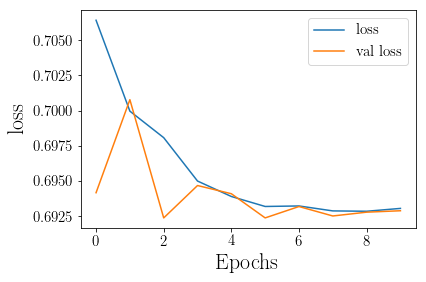

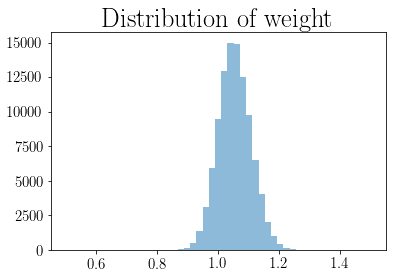

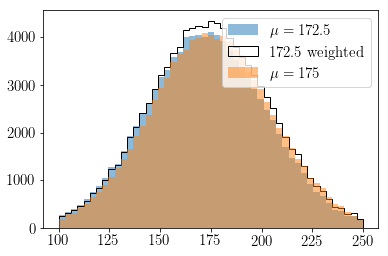

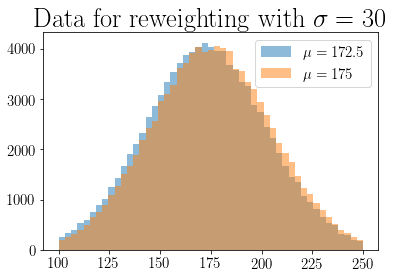

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 108us/step - loss: 0.7084 - val_loss: 0.6925
Epoch 2/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.7016 - val_loss: 0.6922
Epoch 3/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.7013 - val_loss: 0.6923
Epoch 4/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6981 - val_loss: 0.6947
Epoch 5/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6984 - val_loss: 0.7040
Epoch 6/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6959 - val_loss: 0.7042
Epoch 7/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6956 - val_loss: 0.6923
Epoch 8/10
160000/160000 [==============================] - 13s 82us/step - loss: 0.6943 - val_loss: 0.6942
Epoch 9/10
160000/160000 [==============================] - 12s 78us/step - loss: 0.

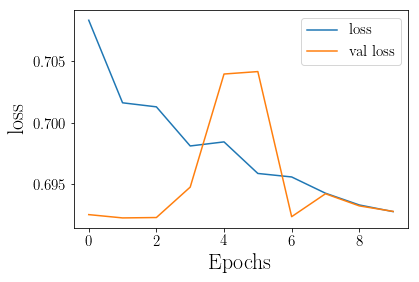

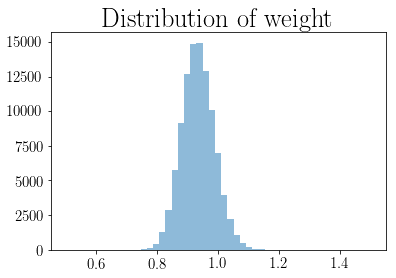

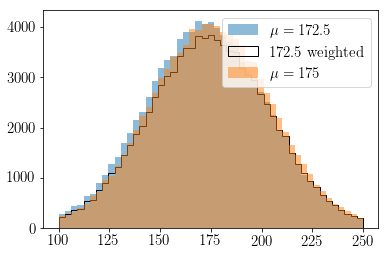

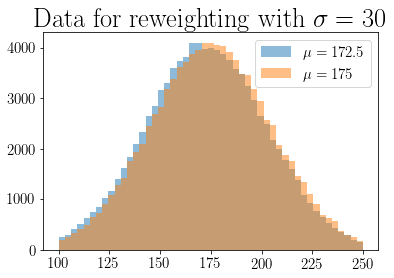

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 109us/step - loss: 0.7128 - val_loss: 0.6965
Epoch 2/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.7062 - val_loss: 0.6938
Epoch 3/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.7024 - val_loss: 0.6945
Epoch 4/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.7017 - val_loss: 0.6928
Epoch 5/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6990 - val_loss: 0.6927
Epoch 6/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.6962 - val_loss: 0.7017
Epoch 7/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6952 - val_loss: 0.6939
Epoch 8/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6932 - val_loss: 0.6936
Epoch 9/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.

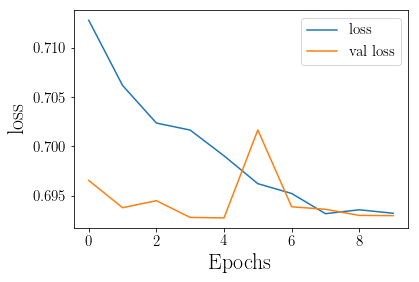

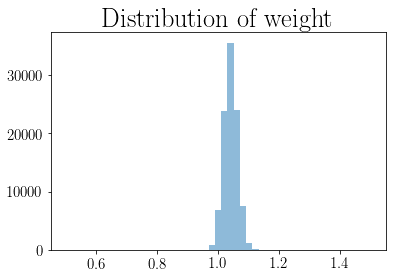

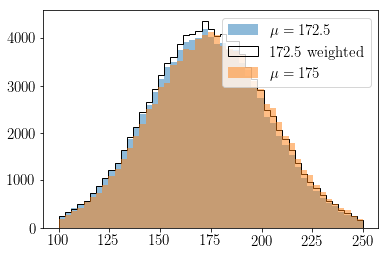

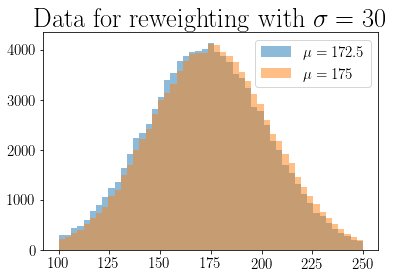

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 17s 104us/step - loss: 0.7184 - val_loss: 0.6945
Epoch 2/10
160000/160000 [==============================] - 11s 70us/step - loss: 0.7035 - val_loss: 0.6925
Epoch 3/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.7005 - val_loss: 0.6954
Epoch 4/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6998 - val_loss: 0.6935
Epoch 5/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6969 - val_loss: 0.6926
Epoch 6/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6957 - val_loss: 0.6923
Epoch 7/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6936 - val_loss: 0.6931
Epoch 8/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.6932 - val_loss: 0.6938
Epoch 9/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.

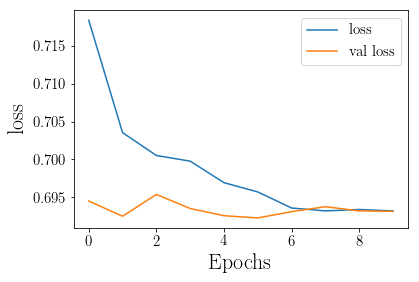

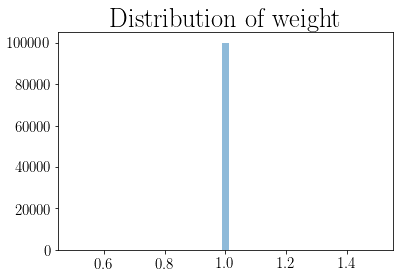

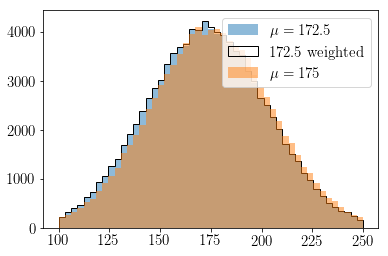

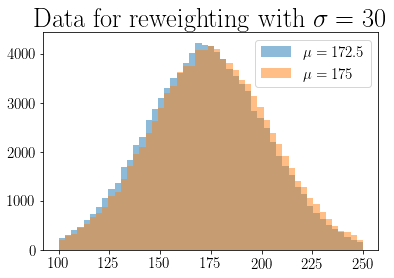

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 18s 112us/step - loss: 0.7386 - val_loss: 0.7117
Epoch 2/10
160000/160000 [==============================] - 13s 83us/step - loss: 0.7041 - val_loss: 0.6925
Epoch 3/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.7040 - val_loss: 0.7064
Epoch 4/10
160000/160000 [==============================] - 11s 70us/step - loss: 0.7018 - val_loss: 0.6976
Epoch 5/10
160000/160000 [==============================] - 13s 82us/step - loss: 0.6979 - val_loss: 0.6931
Epoch 6/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6946 - val_loss: 0.6937
Epoch 7/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6936 - val_loss: 0.6934
Epoch 8/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6930 - val_loss: 0.6929
Epoch 9/10
160000/160000 [==============================] - 14s 85us/step - loss: 0.

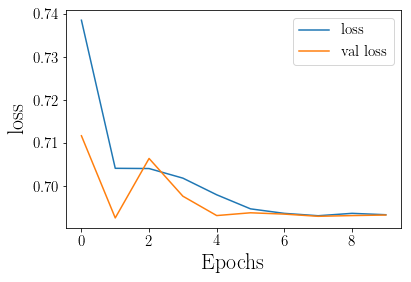

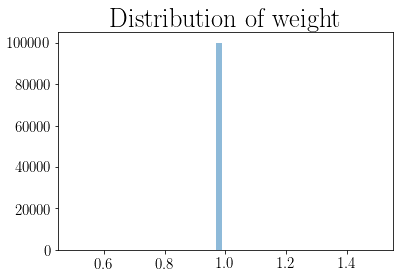

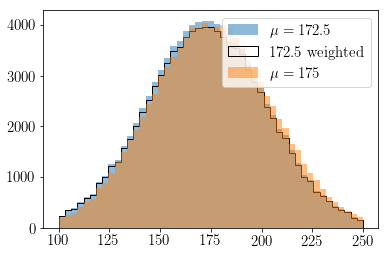

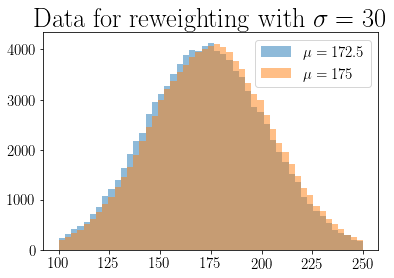

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 18s 112us/step - loss: 0.9314 - val_loss: 0.6932
Epoch 2/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.7019 - val_loss: 0.6931
Epoch 3/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6997 - val_loss: 0.6927
Epoch 4/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6989 - val_loss: 0.7010
Epoch 5/10
160000/160000 [==============================] - 13s 81us/step - loss: 0.6987 - val_loss: 0.7022
Epoch 6/10
160000/160000 [==============================] - 13s 79us/step - loss: 0.6950 - val_loss: 0.6945
Epoch 7/10
160000/160000 [==============================] - 11s 69us/step - loss: 0.6945 - val_loss: 0.6932
Epoch 8/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6929 - val_loss: 0.6925
Epoch 9/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.

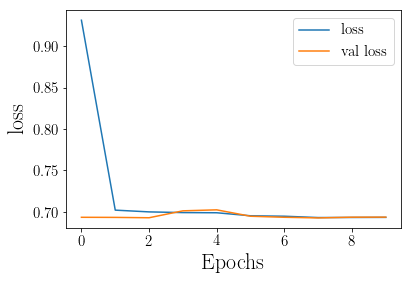

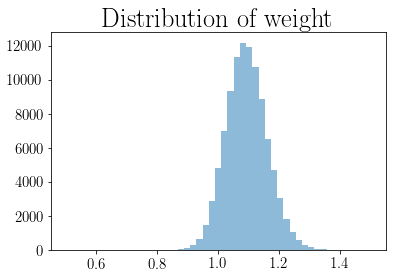

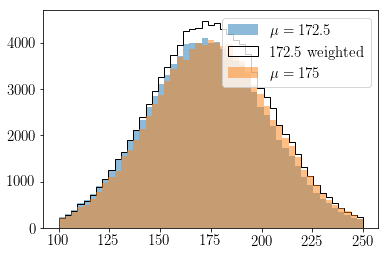

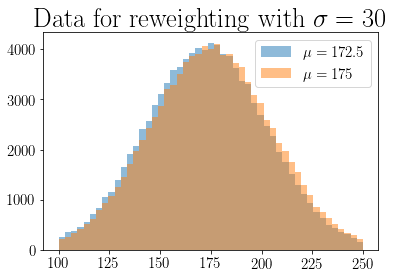

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 18s 113us/step - loss: 0.7612 - val_loss: 0.6938
Epoch 2/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.7105 - val_loss: 0.7207
Epoch 3/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.7087 - val_loss: 0.7199
Epoch 4/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.7022 - val_loss: 0.7013
Epoch 5/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.7014 - val_loss: 0.6936
Epoch 6/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6977 - val_loss: 0.6955
Epoch 7/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6961 - val_loss: 0.6927
Epoch 8/10
160000/160000 [==============================] - 13s 80us/step - loss: 0.6944 - val_loss: 0.6938
Epoch 9/10
160000/160000 [==============================] - 12s 76us/step - loss: 0.

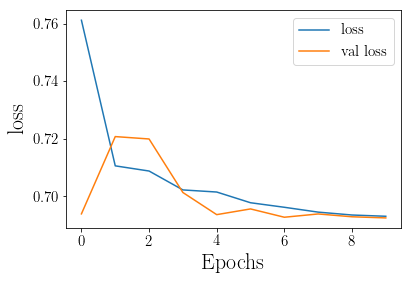

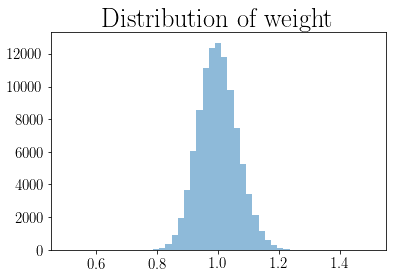

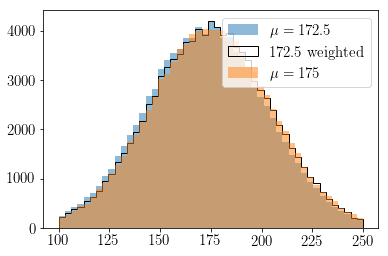

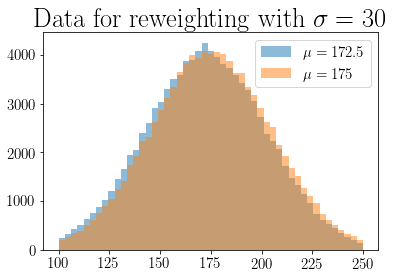

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 18s 113us/step - loss: 0.7008 - val_loss: 0.6950
Epoch 2/10
160000/160000 [==============================] - 13s 84us/step - loss: 0.6945 - val_loss: 0.6933
Epoch 3/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6934 - val_loss: 0.6939
Epoch 4/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6932 - val_loss: 0.6925
Epoch 5/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6932 - val_loss: 0.6939
Epoch 6/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6931 - val_loss: 0.6932
Epoch 7/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6932 - val_loss: 0.6927
Epoch 8/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6931 - val_loss: 0.6931
Epoch 9/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.

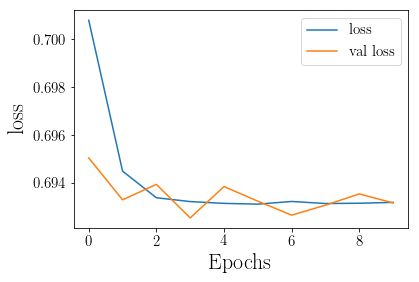

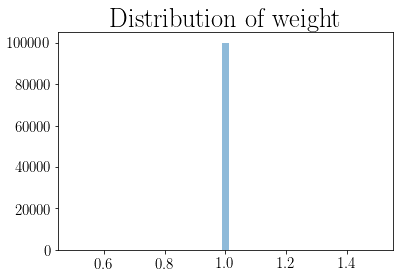

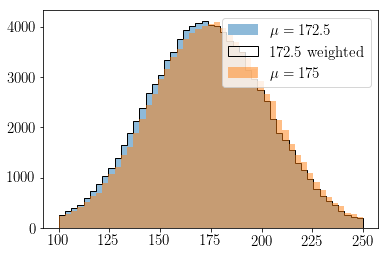

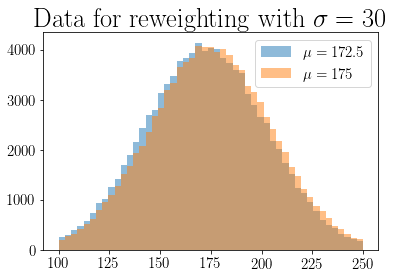

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 16s 97us/step - loss: 0.8168 - val_loss: 0.6989
Epoch 2/10
160000/160000 [==============================] - 14s 88us/step - loss: 0.7040 - val_loss: 0.7090
Epoch 3/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.7034 - val_loss: 0.6922
Epoch 4/10
160000/160000 [==============================] - 14s 88us/step - loss: 0.6992 - val_loss: 0.6956
Epoch 5/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6970 - val_loss: 0.6922
Epoch 6/10
160000/160000 [==============================] - 14s 88us/step - loss: 0.6952 - val_loss: 0.6930
Epoch 7/10
160000/160000 [==============================] - 14s 86us/step - loss: 0.6937 - val_loss: 0.6937
Epoch 8/10
160000/160000 [==============================] - 14s 87us/step - loss: 0.6929 - val_loss: 0.6924
Epoch 9/10
160000/160000 [==============================] - 14s 88us/step - loss: 0.6

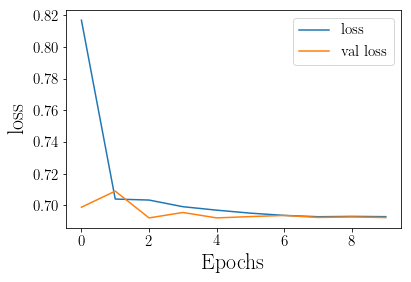

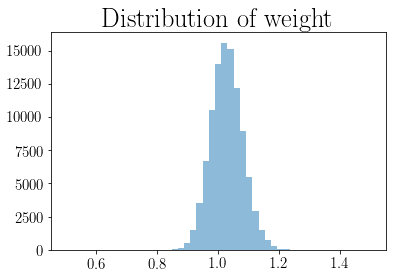

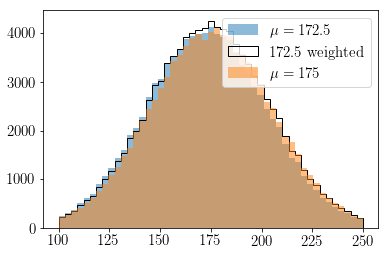

In [10]:
for i in range(20):
    reweight(10**5)